In [20]:
#importar as bibliotecas e modelo de classificação e validação

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [3]:
#carregar o dataset iris
iris = datasets.load_iris()

In [4]:
#explorar as chaves do dataset
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
#explorar uma parte dos dados
iris.data[0: 5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
#explorar a forma das features
iris.data.shape

(150, 4)

In [7]:
#explorar o alvo
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
#explorar o formato do alvo
iris.target.shape

(150,)

In [9]:
#explorar os nomes dos alvos
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
#explorar os nomes das features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
#tranformar os dados em dataframes com pandas, organizar e continuar exploração visual
df1 = pd.DataFrame(data = iris['data'])
df2 = pd.DataFrame(data = iris['target'])
df1.columns = iris.feature_names
df2.columns = ['target']
df = pd.concat([df1, df2], axis=1, sort=False)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
#explorar dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [13]:
#explorar estatistica do dataframe 
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
#explorar correlações entre os dados
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


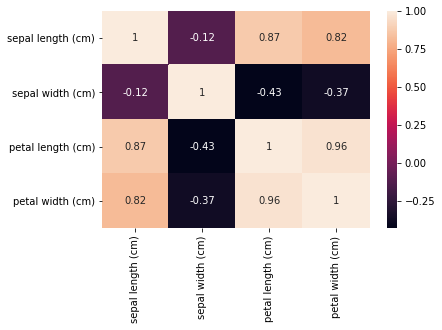

In [16]:
#explorar correlações entre as features de forma gráfica
sns.heatmap(df1.corr(), annot = True)

Text(0, 0.5, 'petal width (cm)')

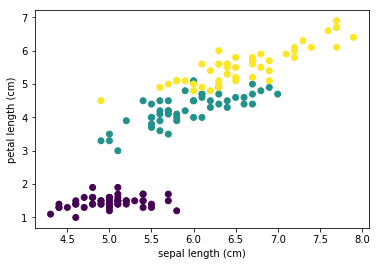

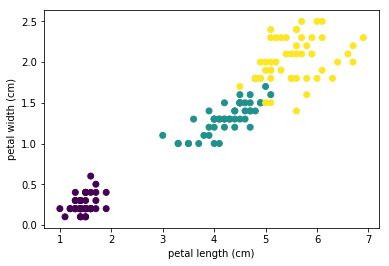

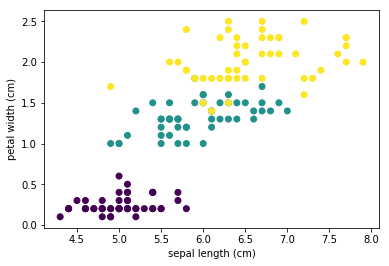

In [17]:
#explorar correlações entre os dados com gráfico de dispersão

plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df.target)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

plt.figure()

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df.target)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.figure()

plt.scatter(df['sepal length (cm)'], df['petal width (cm)'], c=df.target)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')

In [22]:
#criar dados de treino e teste, definir modelo KNN e hiperparametro que será utilizado

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = KNeighborsClassifier()
params = {"n_neighbors": np.arange(1,3), "metric": ["euclidean", "cityblock"]}
grid = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid.fit(X_train, y_train)
print('Score do estimador:',grid.best_score_)
print('Melhor quantidade de vizinhos:',grid.best_estimator_.n_neighbors)

Score do estimador: 0.9464285714285714
Melhor quantidade de vizinhos: 1


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
#treinar modelo e validar com os dados de teste

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
model.predict(X_test)
score = cross_val_score(model, X, y, cv=5)
print('Acurácia cruzada:',score)
print('Acurácia média:',score.mean())

Acurácia cruzada: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Acurácia média: 0.96
